In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras


for cate in os.listdir("dataset_new/train/"):
    print(str(len(os.listdir("dataset_new/train/" + cate))) + " " + cate + " images")

617 Closed images
616 no_yawn images
617 Open images
617 yawn images


In [2]:
train_dir='dataset_new/train/'
test_dir='dataset_new/test/'


In [3]:
batch_size =10
epochs = 10
img_height = 48
img_width = 48

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 2467 images belonging to 4 classes.


In [5]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 433 images belonging to 4 classes.


In [6]:
import warnings
 

import os
import glob
import matplotlib.pyplot as plt

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [7]:
img_width,img_height =48,48
input_shape=(img_width,img_height,3)

In [8]:
model = tf.keras.Sequential()

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))



model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))



model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))



model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))



model.add(Dense(4,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                        

In [9]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [10]:
history = model.fit(train_data_gen, epochs=50,
validation_data= val_data_gen,)

Epoch 1/50
247/247 [==============================] - 48s 174ms/step - loss: 1.1841 - accuracy: 0.5582 - val_loss: 1.9732 - val_accuracy: 0.3580
Epoch 2/50
247/247 [==============================] - 41s 167ms/step - loss: 0.7946 - accuracy: 0.6652 - val_loss: 0.4754 - val_accuracy: 0.7275
Epoch 3/50
247/247 [==============================] - 41s 167ms/step - loss: 0.6628 - accuracy: 0.6972 - val_loss: 0.4029 - val_accuracy: 0.7852
Epoch 4/50
247/247 [==============================] - 41s 168ms/step - loss: 0.5485 - accuracy: 0.7471 - val_loss: 0.6038 - val_accuracy: 0.7067
Epoch 5/50
247/247 [==============================] - 42s 171ms/step - loss: 0.5365 - accuracy: 0.7398 - val_loss: 0.4436 - val_accuracy: 0.7552
Epoch 6/50
247/247 [==============================] - 44s 177ms/step - loss: 0.5745 - accuracy: 0.7252 - val_loss: 0.3820 - val_accuracy: 0.8083
Epoch 7/50
247/247 [==============================] - 45s 183ms/step - loss: 0.5414 - accuracy: 0.7377 - val_loss: 0.3504 - val_ac

In [11]:


model.save('model_weight.h5')

In [12]:
import numpy as np

In [13]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= model.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

44/44 - 2s - 2s/epoch - 47ms/step


In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [16]:
cm_plot_labels = ['Closed','no_yawn','Open','yawn']

Confusion matrix, without normalization
[[109   0   0   0]
 [  0 109   0   0]
 [  0   0 107   2]
 [  0   0   2 104]]
Accuracy: 0.991
Precision: 0.991
Recall: 0.991
F-Measure: 0.991


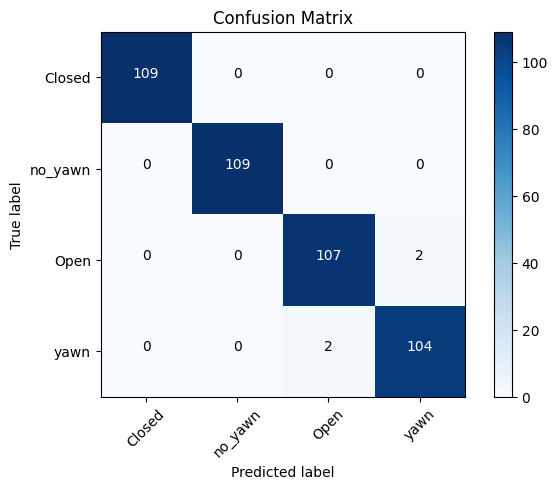

In [17]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [18]:
model_json = model.to_json()
with open("models.json", "w") as json_file:
    json_file.write(model_json)